In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001028734"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001028734
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,COBIZ FINANCIAL INC
Ticker,COBZ


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,31.0,6.091935e+00,1.458891e+00,3.83,4.785000e+00,6.17,7.425000e+00,8.33
interest income,54.0,3.132946e+07,4.376266e+06,23089000.00,2.775325e+07,30449500.00,3.558075e+07,40164000.00
net income,53.0,3.867208e+06,6.333949e+06,-15743000.00,3.322000e+06,5730000.00,7.332000e+06,12981000.00
net interest income,54.0,2.098892e+07,9.979411e+06,-9023000.00,1.773250e+07,22988500.00,2.745900e+07,36050000.00
provision for loan losses,49.0,3.560959e+06,8.558948e+06,-4595000.00,-7.890000e+05,607000.00,1.982000e+06,35249000.00


# Plots

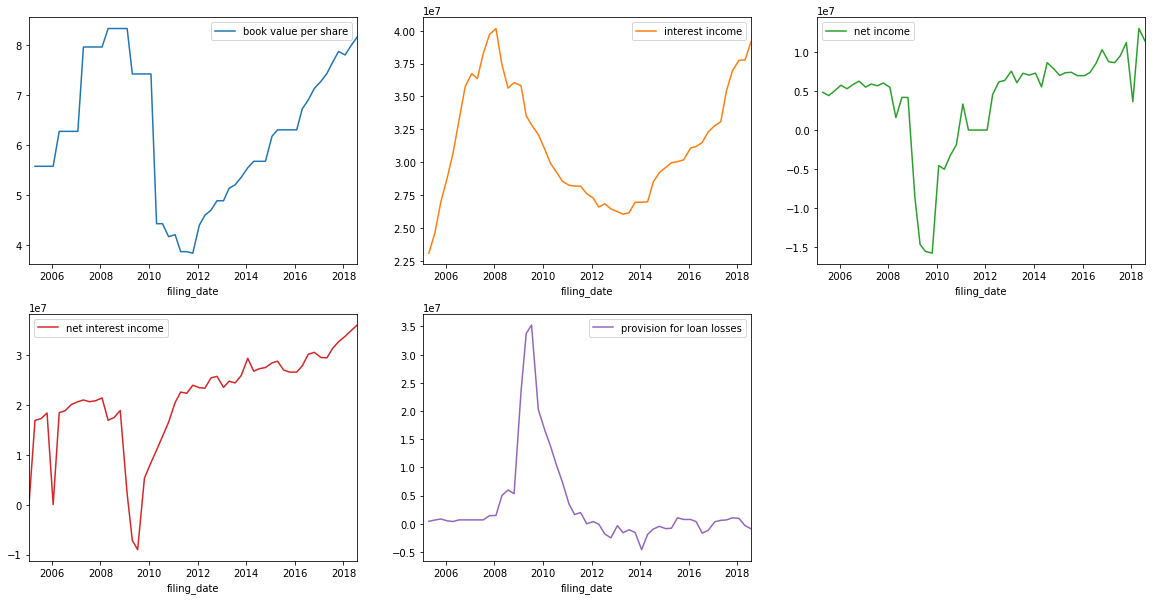

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                              
0001028734 book value per share                            2004Q4  missing   
           book value per share       2005Q2 to 2005Q4: 3 periods  missing   
           book value per share       2006Q2 to 2006Q4: 3 periods  missing   
           book value per share       2007Q2 to 2007Q4: 3 periods  missing   
           book value per share       2008Q2 to 2008Q4: 3 periods  missing   
           book value per share       2009Q2 to 2009Q4: 3 periods  missing   
           book value per share                            2010Q2  missing   
           book value per share                            2011Q2  missing   
           book value per share                            2012Q4  missing   
           book value per share       2014Q2 to 2014Q3: 2 periods  missing   
           book value per share       2015Q2 to 2015Q4: 3 periods  missing   
           interest income                                 2004Q4  missing   
           net income                                      2004Q4  missing   
           net income                                      2015Q4  missing   
           net interest income                             2015Q4  missing   
           provision for loan losses                       2004Q4  missing   
           provision for loan losses  2006Q3 to 2007Q2: 4 periods  missing   
           provision for loan losses                       2015Q4  missing   
           total revenue                                     None    empty   

                                                 message  
cik        item                                           
0001028734 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()